# Dataset - intron classification

In this notebook we'll build two neural networks to classify splice junctions as either: exon:intron (EI), intron:exon (IE) or neither (N).

A splice junction is a DNA sequence that marks the beginning or end of an intron, which is cut or "spliced" out of a coding sequence during RNA processing. Eukaryotic cells do this to ?????


The dataset is from ........

The two neural networks we'll build are:
- A simple network build using the ```scikit-learn``` library
- A more customized neural network built using the ```pytorch``` library

We'll train each network to predict the identity of a DNA sequence and cover techniques to evaluate the accuracy of our networks. 

### topics covered:
- data pre-processing 
- randomly splitting the dataset into training and testing sets
- building and training a neural network with the ```sckikit-learn``` library
- building and training a neural network with the ```pytorch``` library

Learning to customized build neural networks using ```pytorch``` will prime us for future tutorials where we will build more complex networks for specific tasks, including image recognition and chemical learning.

In [22]:
%%bash
# activate the bash shell to easily download the dataset we need
wget https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/splice-junction-gene-sequences/splice.data

bash: line 1: fg: no job control
--2021-03-26 07:01:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/splice-junction-gene-sequences/splice.data
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 319000 (312K) [application/x-httpd-php]
Saving to: ‘splice.data.1’

     0K .......... .......... .......... .......... .......... 16%  159K 2s
    50K .......... .......... .......... .......... .......... 32%  327K 1s
   100K .......... .......... .......... .......... .......... 48% 6.59M 1s
   150K .......... .......... .......... .......... .......... 64%  330K 0s
   200K .......... .......... .......... .......... .......... 80% 5.91M 0s
   250K .......... .......... .......... .......... .......... 96% 9.14M 0s
   300K .......... .     

In [85]:
import pandas as pd # general data handling library 

df = pd.read_csv('splice.data', header=None)
df.columns = [ 'class','name','seq']

print('number of data points: ',len(df))
df.head()

number of data points:  3190


,class,name,seq
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGG...
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGG...
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGG...
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGT...
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTG...


# data preprocessing

Neural networks need numbers as an input, so we'll convert our sequences and labels into a numerical representation

```pandas``` has a very useful ```get_dummies(...``` function, which gives each unique value in each column a *new column* filled with either a ```1``` or a ```0``` to indicate its presence or absence.

In [14]:
# each unique value gets its own column 
# our model will have the same number of outputs

y = pd.get_dummies(df['class'])
y.head()

,EI,IE,N
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
# the sequence strings contain whitespace that needs to go
# we'll give each letter its own cell

seq = pd.DataFrame([list(i) for i in df['seq'].str.replace(' ','')]) # list comprehension!!!!
seq.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,C,C,A,G,C,T,G,C,A,T,...,A,G,C,C,A,G,T,C,T,G
1,A,G,A,C,C,C,G,C,C,G,...,G,T,G,C,C,C,C,C,G,C
2,G,A,G,G,T,G,A,A,G,G,...,C,A,C,G,G,G,G,A,T,G
3,G,G,G,C,T,G,C,G,T,T,...,G,G,T,T,T,T,C,C,C,C
4,G,C,T,C,A,G,C,C,C,C,...,C,C,T,T,G,A,C,C,C,T


In [21]:
x = pd.get_dummies(seq) # here it is! our numerical representation of the sequence
x.head()

,0_A,0_C,0_D,0_G,0_T,1_A,1_C,1_D,1_G,1_T,...,58_A,58_C,58_G,58_N,58_T,59_A,59_C,59_G,59_N,59_T
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


## train-test split

We'll need to hold back some of our training data to make sure that what the neural network has learned applies to data it has never seen before.

In [23]:
from sklearn.model_selection import train_test_split # really useful function

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25) # returns 4 values

x_train

,0_A,0_C,0_D,0_G,0_T,1_A,1_C,1_D,1_G,1_T,...,58_A,58_C,58_G,58_N,58_T,59_A,59_C,59_G,59_N,59_T
2326,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2370,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1992,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
573,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2692,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1078,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1255,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
380,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


# simple neural network using ```scikit-learn```

Neural networks are easy to make using ```scikit-learn```, we'll use the ```MLPClassifier``` (Multi-Layer Perceptron) object here. In this example we'll initialize it with the default parameters, look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to see optional extras.

This MLP implementation automatically detects the number of inputs and outputs during training (```fit```) and creates an appropriately sized network accordingly.

Training is handled automatically for you when we call the ```fit``` function, and give it the inputs and desired outputs. 

In [27]:
from sklearn.neural_network import MLPClassifier

sklearn_model = MLPClassifier()

sklearn_model.fit(x_train, y_train)

y_pred = sklearn_model.predict(x_test)

y_pred

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

# Evaluating accuracy

Our network is trained, but how well does it work?

There are lots of ways to evaluate performance, we'll look at some important ones.

In [28]:
from sklearn import metrics

# dumb accuracy score
# overall fraction of correct answers
metrics.accuracy_score(y_test, y_pred)

0.9323308270676691

In [32]:
# false positive / false negative for each class

confusion_mat = metrics.multilabel_confusion_matrix(y_test, y_pred)

confusion_mat # a 3D matrix 

array([[[588,  15],
        [ 11, 184]],

       [[598,  11],
        [ 15, 174]],

       [[372,  12],
        [ 18, 396]]])

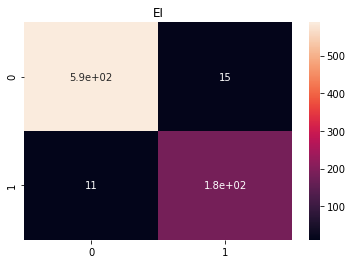

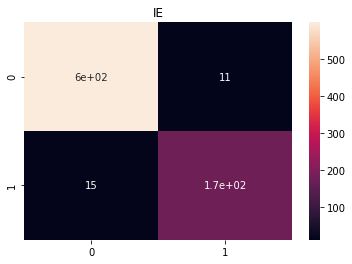

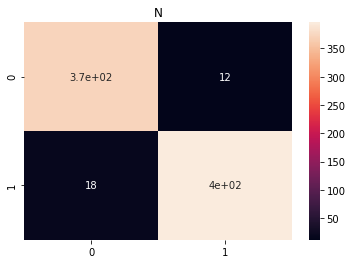

In [35]:
import matplotlib.pyplot as plt # general purpose plotting library
import seaborn as sns # pretty pyplot extension

# lets loop through both:
#   - each 2D matrix in our 3D matrix
#   - the classification labels for each matrix (from the columns of y)
for i, j in zip(confusion_mat, y.columns): 
    sns.heatmap(i, annot=True)
    plt.title(j)
    plt.show()

### Another way to summarize the false positive / true positive rate is plotting a Receiver Operator Curve (ROC)

The area under this curve is a neat indicator of prediction accuracy where more is better

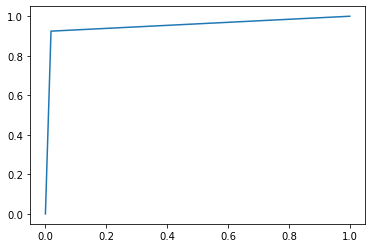

In [38]:
true_pos_rate, false_pos_rate, thresholds = metrics.roc_curve(y_pred[:,0], y_test.iloc[:,0])

plt.plot(true_pos_rate, false_pos_rate)
plt.show()

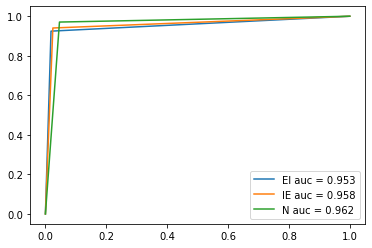

In [44]:
for i in range(3):
    true_pos_rate, false_pos_rate, thresholds = metrics.roc_curve(y_pred[:,i], y_test.iloc[:,i])
    roc_auc = metrics.auc(true_pos_rate, false_pos_rate)
    plt.plot(true_pos_rate, false_pos_rate, 
             label = y.columns[i] + ' auc = ' + str(round(roc_auc,3)))
plt.legend()
plt.show()

# ```pytorch```

```pytorch``` is a popular, open source deep learning library. The foundation of deep learning is fast matrix (tensor) maths, so ```pytorch``` is highly optimized for fast, parralel maths on CPUs and NVIDIA GPUs if you have them.

```pytorch``` also contains neural networks parts, numerical optimizers and score functions, amongst other things. 

This will give us the tools we need to build a neural network for almost any task with very fine-grained control. At the same time, it is more hands-on than the ```scikit-learn``` implementation we just looked at.

```pytorch``` has syntax very similar to ```numpy```, which underlies ```pandas``` and is what we have been using so far. 

```pytorch``` has its own version of a ```numpy``` array, which we can convert to fairly easily. ```pytorch``` is quite picky about data types, so we'll be converting everything into a ```float``` (decimal number) if it isn't already.

```pytorch``` has an easy interface for piecing together layers - the ```nn.Sequential(..``` object. We'll use this to string together these layers:
- ```nn.Linear(in_features, out_features)```  - a simple, fully connected neural network layer where every input is connected to every output. we specify the number of inputs and number of outputs. 
- ```nn.ReLU()``` - an "activation function"  - this one sets every negative input to ```0``` and leaves every positive output the same. This is a very common layer for the internals of a network, because it regulates layer outputs without presenting a difficult problem for our optimizer - more on that later
- ```nn.Linear(..``` - this again! it will take in the modulated outputs of the previous layer and output our predictions, one neuron for each of the 3 possible classes
- ```nn.Softmax(dim)``` - another activation function. This normalizes the outputs so that the 3 output neurons output positive numbers that will sum to 1. we can use the neuron with the greatest output value to decide on our prediction value. ```dim``` specifies which axis to take our normalization along.

In [49]:
import torch
import torch.nn as nn

# torch tensor copies of our data
XTRAIN = torch.from_numpy(x_train.values).float()
XTEST = torch.from_numpy(x_test.values).float()
YTRAIN = torch.from_numpy(y_train.values).float()
YTEST = torch.from_numpy(y_test.values).float()

# our neural network
model = nn.Sequential(nn.Linear(in_features=x.shape[1], out_features= 8),
                     nn.ReLU(),
                     nn.Linear(8,3),
                     nn.Softmax(dim=1))

model(XTRAIN) # example prediction

tensor([[0.2963, 0.2753, 0.4284],
        [0.2814, 0.2778, 0.4408],
        [0.2753, 0.2690, 0.4558],
        ...,
        [0.2901, 0.2802, 0.4297],
        [0.2853, 0.2628, 0.4519],
        [0.2538, 0.2540, 0.4922]], grad_fn=<SoftmaxBackward>)

# training our ```pytorch``` neural network

There's a lot going on in the cell below, so let's break it down.

### what we have so far:
- our neural network
- our dataset

### what we need:
- **an optimizer*** - this will optimize our neural network parameters during training so that minimize error. ```pytorch``` has plenty of options that we'll cover in more detail in future sessions. today we'll use the ```Adam``` (adaptive momentum) optimizer, which we initialise with the model parameters that need to be optimized and the "learning rate" - a scaling factor for each of the adjustments we'll make to our parameters. We'll use a fairly small value so we can take small steps. 
- **a loss function** - a function to quantify our classifcation error. in each step we'll use the loss function to inform the optimizer how off target our predictions are and adjust the parameters accordingly.


### backpropagation
To optimize our parameters efficiently, we'll be using the "backpropagation" algorithm. I'll save an explaination for a future tutorial but [this video](https://www.youtube.com/watch?v=Ilg3gGewQ5U) provides a beautiful explaination. What we need to know for this training loop is:
- model error / ```loss``` is calculated 
- **backpropagation** is used to calculate how much the parameters of the final layer of the network should change, and then the layer before that, etc. this is invoked when we call ```loss.backward()```. the optimizer holds onto these values, ready to adjust the network parameters
- ```opt.step()``` - adjust the parameters!
- ```opt.zero_grad()``` - clear out the cached parameter adjustments, ready for the next loop

In [66]:
from tqdm import tqdm # progress bar

opt = torch.optim.Adam(model.parameters(), lr = 1e-3) # optimizer for model parameters
loss_fn = nn.BCELoss() # classification score

# so we can plot training progress
loss_record = []

for i in tqdm(range(1000)):
    yh = model(XTRAIN) # predict
    loss = loss_fn(yh, YTRAIN) # calculate loss / error
    # optimize parameters:
    loss.backward() # "backpropagate" error through network - caclulate how much to adjust each parameter by
    opt.step() # optimizer adjusts parameters
    opt.zero_grad() # reset optimizer in each step
    
    # for plotting
    loss_record.append(loss.detach()) # detach stops pytorch from tracking gradients for this copy
    
print(loss) # loss on training data

100%|██████████| 1000/1000 [00:02<00:00, 402.82it/s]

tensor(0.0032, grad_fn=<BinaryCrossEntropyBackward>)


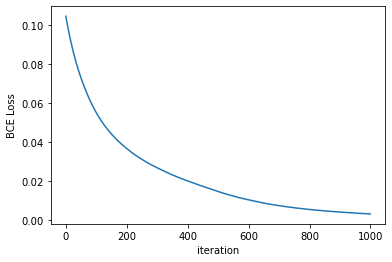

In [67]:
plt.plot(loss_record)
plt.xlabel('iteration')
plt.ylabel('BCE Loss')
plt.show()

In [84]:
yh_test = model(XTEST)
# metrics.accuracy_score(y_test, yh_test.detach().numpy())

yh_labels = yh_test.argmax(dim=1).numpy()
y_test_labels = y_test.values.argmax(axis=1)

print(yh_labels[:5])
print(y_test_labels[:5])

metrics.accuracy_score(yh_labels, y_test_labels)

[0 0 1 0 1]
[0 0 1 0 1]


0.9223057644110275